In [1]:
import pandas as pd
import numpy as np

In [2]:
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

In [3]:
df = pd.read_csv(file_url)

In [4]:
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

In [5]:
df_cleaned = df.copy()

In [6]:
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [9]:
X_train_cleaned = X_train.copy()

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [11]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [12]:
sc = StandardScaler()

In [13]:
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

In [14]:
cat_cols = ['Gender']

In [15]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [16]:
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

In [17]:
X_train_cleaned.reset_index(drop=True, inplace=True)

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [19]:
model = KElbowVisualizer(KMeans(), k=(2,15))

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

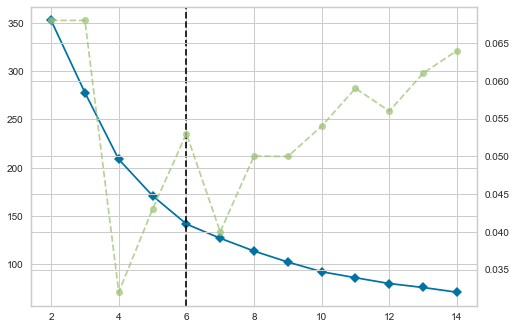

In [20]:
model.fit(X_train_cleaned)

In [21]:
n_clusters = model.elbow_value_

In [22]:
from sklearn.mixture import GaussianMixture

In [23]:
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [24]:
gmm.fit(X_train_cleaned)

GaussianMixture(n_components=6, random_state=8)

In [25]:
gmm.predict(X_train_cleaned)

array([2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 4, 4, 2, 4, 5, 2, 2, 5, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2,
       4, 2, 3, 4, 0, 3, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 1, 2, 3,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 4, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 4, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 4,
       0, 2, 2, 3, 5, 2, 2, 2, 3, 3, 4, 4, 2, 0, 2, 2, 2, 1, 1, 2, 4, 1,
       2, 1, 4, 5, 5, 4, 4, 2, 2, 3, 1, 2, 4, 2, 2, 1, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [26]:
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

In [27]:
gmm.predict(obs)

array([2], dtype=int64)

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [30]:
cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

In [31]:
from sklearn.compose import ColumnTransformer

In [32]:
# Solution:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

In [33]:
# Solution:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [34]:
gmm_pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('clustering',
                 GaussianMixture(n_components=6, random_state=8))])

In [35]:
gmm_pipe.predict(X_train)

array([2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 4, 4, 2, 4, 5, 2, 2, 5, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2,
       4, 2, 3, 4, 0, 3, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 1, 2, 3,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 4, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 4, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 4,
       0, 2, 2, 3, 5, 2, 2, 2, 3, 3, 4, 4, 2, 0, 2, 2, 2, 1, 1, 2, 4, 1,
       2, 1, 4, 5, 5, 4, 4, 2, 2, 3, 1, 2, 4, 2, 2, 1, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [36]:
# Solution:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2], dtype=int64)

In [ ]:
# Solution:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')